# Implementing a Neural Net from Scratch using Theano

In [1]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib
import matplotlib.pyplot as plt
rng = np.random
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## Generate a Dataset

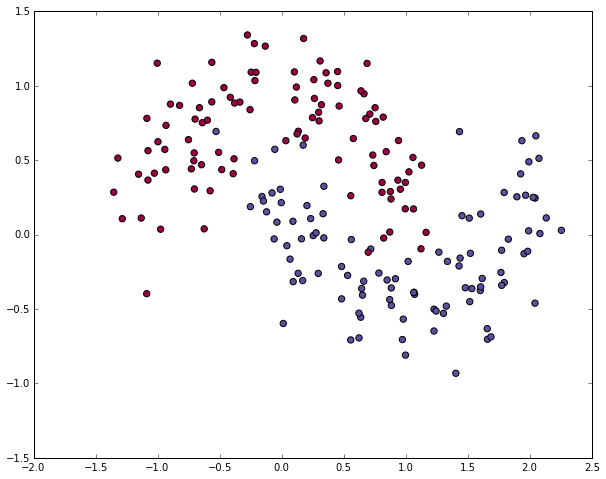

In [2]:
# Generate a dataset and plot it
from sklearn.datasets import make_moons
np.random.seed(0)
data_X, data_y = make_moons(200, noise=0.20)
plt.scatter(data_X[:,0], data_X[:,1], s=40, c=data_y, cmap=plt.cm.Spectral)

## Implement a logistic regression in Theano

In [3]:
# Initialize variables
N = data_X.shape[0]
feats = data_X.shape[1]
training_steps = 10000

In [4]:
# Declare Theano symbolic variables
x = T.matrix("x")
y = T.vector("y")
w = theano.shared(rng.randn(feats), name="w")
b = theano.shared(0., name="b")
#print("Initial model:")
#print(w.get_value())
#print(b.get_value())

In [5]:
# Construct Theano expression graph
p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))       # Probability that target = 1
prediction = p_1 > 0.5                        # The prediction thresholded
xent = -y * T.log(p_1) - (1-y) * T.log(1-p_1) # Cross-entropy loss function
cost = xent.mean() + 0.01 * (w ** 2).sum()    # The cost to minimize
gw, gb = T.grad(cost, [w, b])                 # Compute the gradient of the cost
                                              # (we shall return to this in a
                                              # following section of this tutorial)

In [6]:
# Compile
train = theano.function(inputs = [x,y],
                        outputs = [prediction, xent],
                        updates = ((w, w - 0.1 * gw), (b, b - 0.1 * gb)))
predict = theano.function(inputs=[x], outputs = prediction)

## Training the logistic regression

In [ ]:
# Train
for i in range(training_steps):
    pred, err = train(data_X, data_y)
    if i%1000==0:
        print 'Iteration: {}'.format(i)
        print 'First 10 predictions: {}'.format(pred[:10])
        print 'Average Error: {}'.format(err.mean())
    

print("Final model:")
print(w.get_value())
print(b.get_value())

## Prediction and evaluation

In [7]:
print("target values for D:")
print(data_y)
pred_y = predict(data_X)
print("prediction on D:")
print(pred_y)

Iteration: 0
First 10 predictions: [0 0 1 1 0 0 0 0 0 0]
Average Error: 1.05857110327
Iteration: 1000
First 10 predictions: [0 1 0 0 1 1 1 1 1 1]
Average Error: 0.345158388478
Iteration: 2000
First 10 predictions: [0 1 0 0 1 1 1 1 1 1]
Average Error: 0.344270769076
Iteration: 3000
First 10 predictions: [0 1 0 0 1 1 1 1 1 1]
Average Error: 0.34425447866
Iteration: 4000
First 10 predictions: [0 1 0 0 1 1 1 1 1 1]
Average Error: 0.344254176111
Iteration: 5000
First 10 predictions: [0 1 0 0 1 1 1 1 1 1]
Average Error: 0.344254170492
Iteration: 6000
First 10 predictions: [0 1 0 0 1 1 1 1 1 1]
Average Error: 0.344254170387
Iteration: 7000
First 10 predictions: [0 1 0 0 1 1 1 1 1 1]
Average Error: 0.344254170385
Iteration: 8000
First 10 predictions: [0 1 0 0 1 1 1 1 1 1]
Average Error: 0.344254170385
Iteration: 9000
First 10 predictions: [0 1 0 0 1 1 1 1 1 1]
Average Error: 0.344254170385
Final model:
[ 1.01088909 -2.17568794]
0.0779296051489
target values for D:
[0 1 1 0 1 1 0 1 0 1 0 1 1 1 

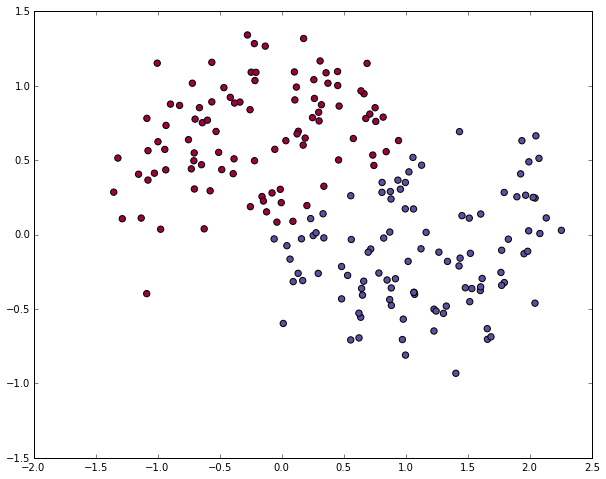

In [15]:
# predictions
plt.scatter(data_X[:,0], data_X[:,1], s=40, c=pred_y, cmap=plt.cm.Spectral)

## Implementing a neural network